# DSCI 100 Group Project: Predicting Diabetes Diagnoses

## Introduction

The Multiple Disease Prediction dataset uses various health-related parameters (such as glucose and cholesterol levels, insulin levels, and BMI) to check the health of a person - whether they are healthy or afflicted with a specific disease (Diabetes, Thalasse, Heart Disease Anemia, or Thromboc). In this project, we set out to create a classification model to examine to what accuracy we can predict the disease a person with certain parameters can be diagnosed with, or more specifically, to what accuracy we can predict whether a person can be diagnosed with Diabetes.

## Methods & Results

### Loading libraries

In [2]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
library(janitor)
install.packages("themis")
library(themis)
install.packages("yardstick")
library(yardstick)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

First we load all required libraries necessary for our analysis.
Besides the familiar ones, we installed two additional packages, 'themis' and 'yardstick'.
Then with all required libraries in place, we load our dataset from the the web, storing it into the variable "blood_samples".

### Loading the data

In [3]:
blood_samples <- read_csv("data/blood_samples_dataset.csv")
head(blood_samples)

Rows: 551 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Disease
dbl (24): Glucose, Cholesterol, Hemoglobin, Platelets, White Blood Cells, Re...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,⋯,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.001827491,0.03369271,0.11475525,0.9979266,0.56260425,0.86649852,0.57804177,0.91461549,0.02686409,0.03864091,⋯,0.6532299,0.1861045,0.4303978,0.01667792,0.8853520,0.6527334,0.78823514,0.05478811,0.03131344,Thalasse
0.436679025,0.97265269,0.08499819,0.1809086,0.67573568,0.56388877,0.79838214,0.67036126,0.37609238,0.18489008,⋯,0.8335397,0.1530008,0.4585328,0.40184452,0.6359693,0.5744248,0.04702496,0.60798545,0.59412308,Diabetes
0.545697158,0.32481486,0.58446699,0.4757480,0.55859609,0.66100693,0.93405588,0.38178237,0.50034229,0.53182931,⋯,0.6789008,0.2204789,0.8171514,0.69098100,0.1016329,0.8557403,0.55112419,0.41329445,0.07090907,Heart Di
0.172994018,0.05035101,0.73599966,0.7820224,0.06943548,0.08521937,0.03290692,0.46061943,0.78544795,0.49149522,⋯,0.3815002,0.4593956,0.4201545,0.79853707,0.3992360,0.3245997,0.49950360,0.43666181,0.24276586,Diabetes
0.758534051,0.73996775,0.59786776,0.7726835,0.87571974,0.86026493,0.48618863,0.48668607,0.62104804,0.19175598,⋯,0.9933815,0.2723384,0.6635788,0.26522715,0.9188472,0.8049102,0.57111909,0.18836767,0.75084752,Heart Di
0.321872226,0.55464909,0.19565226,0.4272160,0.80775117,0.37696424,0.51952589,0.02808989,0.38253820,0.56820531,⋯,0.7113771,0.8878635,0.3703437,0.60706574,0.9364447,0.1603547,0.10899414,0.59907098,0.56053500,Heart Di


The dataset is already in tidy format where each column is a variable, each row is a single observation, and each cell is a value.
All values in the dataset also have already been centered and scaled to a standard number from 0 to 1. 

The column names are not in the correct format as there are capital leters and spaces. The `Disease` column is also of type character when it should be factor type as there are distinct classes.

We will use clean_names and mutate the `Disease` column to be a factor

In [4]:
blood_samples <- blood_samples |>
                clean_names() |>
                mutate(disease = as_factor(disease))

head(blood_samples)

glucose,cholesterol,hemoglobin,platelets,white_blood_cells,red_blood_cells,hematocrit,mean_corpuscular_volume,mean_corpuscular_hemoglobin,mean_corpuscular_hemoglobin_concentration,⋯,hb_a1c,ldl_cholesterol,hdl_cholesterol,alt,ast,heart_rate,creatinine,troponin,c_reactive_protein,disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.001827491,0.03369271,0.11475525,0.9979266,0.56260425,0.86649852,0.57804177,0.91461549,0.02686409,0.03864091,⋯,0.6532299,0.1861045,0.4303978,0.01667792,0.8853520,0.6527334,0.78823514,0.05478811,0.03131344,Thalasse
0.436679025,0.97265269,0.08499819,0.1809086,0.67573568,0.56388877,0.79838214,0.67036126,0.37609238,0.18489008,⋯,0.8335397,0.1530008,0.4585328,0.40184452,0.6359693,0.5744248,0.04702496,0.60798545,0.59412308,Diabetes
0.545697158,0.32481486,0.58446699,0.4757480,0.55859609,0.66100693,0.93405588,0.38178237,0.50034229,0.53182931,⋯,0.6789008,0.2204789,0.8171514,0.69098100,0.1016329,0.8557403,0.55112419,0.41329445,0.07090907,Heart Di
0.172994018,0.05035101,0.73599966,0.7820224,0.06943548,0.08521937,0.03290692,0.46061943,0.78544795,0.49149522,⋯,0.3815002,0.4593956,0.4201545,0.79853707,0.3992360,0.3245997,0.49950360,0.43666181,0.24276586,Diabetes
0.758534051,0.73996775,0.59786776,0.7726835,0.87571974,0.86026493,0.48618863,0.48668607,0.62104804,0.19175598,⋯,0.9933815,0.2723384,0.6635788,0.26522715,0.9188472,0.8049102,0.57111909,0.18836767,0.75084752,Heart Di
0.321872226,0.55464909,0.19565226,0.4272160,0.80775117,0.37696424,0.51952589,0.02808989,0.38253820,0.56820531,⋯,0.7113771,0.8878635,0.3703437,0.60706574,0.9364447,0.1603547,0.10899414,0.59907098,0.56053500,Heart Di


In [5]:
disease_counts <- blood_samples |>
group_by(disease) |>
summarize(count = n())
disease_counts

disease,count
<fct>,<int>
Thalasse,62
Diabetes,310
Heart Di,39
Anemia,100
Thromboc,19
Healthy,21


Due to the disproportionately large sample of Diabetes observations compared to all other diseases, we will group all non-diabetes observations into their own column, "Not Diabetes", and compare with the number of diabetes observations:

In [6]:
blood_samples <- blood_samples |>
                mutate(disease = recode(disease, 
                                       "Diabetes" = "Diabetes",
                                       "Thalasse" = "Not Diabetes",
                                       "Heart Di" = "Not Diabetes",
                                       "Anemia" = "Not Diabetes",
                                       "Thromboc" = "Not Diabetes",
                                       "Healthy" = "Not Diabetes"))
                 

head(blood_samples)

glucose,cholesterol,hemoglobin,platelets,white_blood_cells,red_blood_cells,hematocrit,mean_corpuscular_volume,mean_corpuscular_hemoglobin,mean_corpuscular_hemoglobin_concentration,⋯,hb_a1c,ldl_cholesterol,hdl_cholesterol,alt,ast,heart_rate,creatinine,troponin,c_reactive_protein,disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.001827491,0.03369271,0.11475525,0.9979266,0.56260425,0.86649852,0.57804177,0.91461549,0.02686409,0.03864091,⋯,0.6532299,0.1861045,0.4303978,0.01667792,0.8853520,0.6527334,0.78823514,0.05478811,0.03131344,Not Diabetes
0.436679025,0.97265269,0.08499819,0.1809086,0.67573568,0.56388877,0.79838214,0.67036126,0.37609238,0.18489008,⋯,0.8335397,0.1530008,0.4585328,0.40184452,0.6359693,0.5744248,0.04702496,0.60798545,0.59412308,Diabetes
0.545697158,0.32481486,0.58446699,0.4757480,0.55859609,0.66100693,0.93405588,0.38178237,0.50034229,0.53182931,⋯,0.6789008,0.2204789,0.8171514,0.69098100,0.1016329,0.8557403,0.55112419,0.41329445,0.07090907,Not Diabetes
0.172994018,0.05035101,0.73599966,0.7820224,0.06943548,0.08521937,0.03290692,0.46061943,0.78544795,0.49149522,⋯,0.3815002,0.4593956,0.4201545,0.79853707,0.3992360,0.3245997,0.49950360,0.43666181,0.24276586,Diabetes
0.758534051,0.73996775,0.59786776,0.7726835,0.87571974,0.86026493,0.48618863,0.48668607,0.62104804,0.19175598,⋯,0.9933815,0.2723384,0.6635788,0.26522715,0.9188472,0.8049102,0.57111909,0.18836767,0.75084752,Not Diabetes
0.321872226,0.55464909,0.19565226,0.4272160,0.80775117,0.37696424,0.51952589,0.02808989,0.38253820,0.56820531,⋯,0.7113771,0.8878635,0.3703437,0.60706574,0.9364447,0.1603547,0.10899414,0.59907098,0.56053500,Not Diabetes


In [7]:
diabetes_counts <- blood_samples |>
group_by(disease) |>
summarize(count = n())
diabetes_counts

disease,count
<fct>,<int>
Not Diabetes,241
Diabetes,310


Selecting for or against diabetes seems like a better and more balanced way to approach classification here. We will create our model to identify whether a person has diabetes or not. 

### Summarizing the training data

Spliting the data into a training subset and a testing subset. 75% of the total data goes to training, 25% to testing.

In [9]:
set.seed(1)

blood_samples_split <- initial_split(blood_samples, prop = 0.75, strata = disease)
training_blood_samples <- training(blood_samples_split)
testing_blood_samples <- testing(blood_samples_split)

How many observations are there for each disease.

In [10]:
obersvation_count <- training_blood_samples |>
            group_by(disease) |>
            summarize(count = n())
obersvation_count

disease,count
<fct>,<int>
Not Diabetes,180
Diabetes,232


In [37]:
dns_recipe <- recipe(disease ~ ., data = training_blood_samples) |>
    step_downsample(disease, under_ratio = 1, skip = FALSE) |>
    prep()

training_blood_samples <- bake(dns_recipe, training_blood_samples)

obersvation_count <- training_blood_samples |>
            group_by(disease) |>
            summarize(count = n())

obersvation_count

disease,count
<fct>,<int>
Not Diabetes,180
Diabetes,180


### Visualizing the training data

The primary signifiers of diabetes is in the glucose levels and insulin levels, where those with diabetes tend to have higher glucose and insulin levels. Let's compare the quantities of glucose and insulin in the non-diabetic group versus the diabetic group.

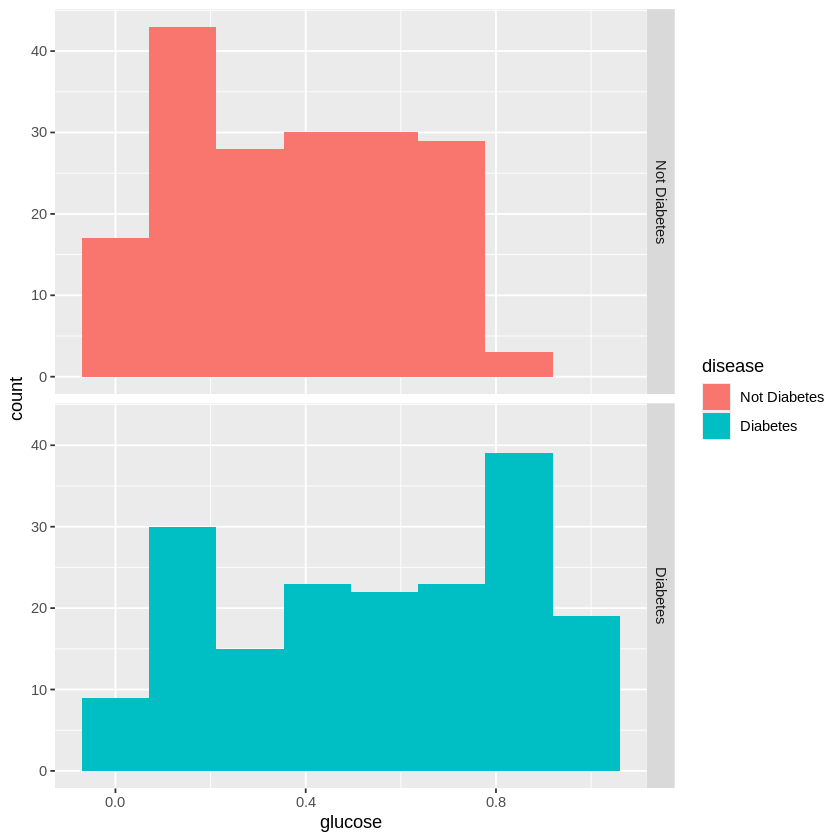

In [38]:
glucose_histogram <- training_blood_samples |> 
                        ggplot(aes(x=glucose, fill = disease)) +
                        geom_histogram(bins = 8) +
                        facet_grid(rows = vars(disease))
glucose_histogram

In diabetics, blood sugar (glucose) tends to build up in the bloodstream, leading to a condition called hyperglycemia. From this graph comparison, it's difficult to discern the difference between each group's average glucose levels, but those with diabetes have a higher range of glucose levels. Let's compute the mean glucose levels of each group; the diabetic group should have a higher average.

In [40]:
mean_glucose <- training_blood_samples |>
group_by(disease) |>
summarize(mean_glucose = mean(glucose)) 
mean_glucose

disease,mean_glucose
<fct>,<dbl>
Not Diabetes,0.3685351
Diabetes,0.5488967


This matches with our hypothesis. Now we will examine insulin levels. Type II diabetes is characterized by an increased resistance to insulin, which directly correlates with increased glucose levels, which in turn prompts the body to create more insulin. However, Type I diabetes is caused by the body's inability to make insulin, and so Type I diabetics need to take insulin to survive. While our data doesn't distinguish between Type I and Type II diabetes, we should see in the diabetic group a larger range of insulin levels as opposed to the non-diabetic group.

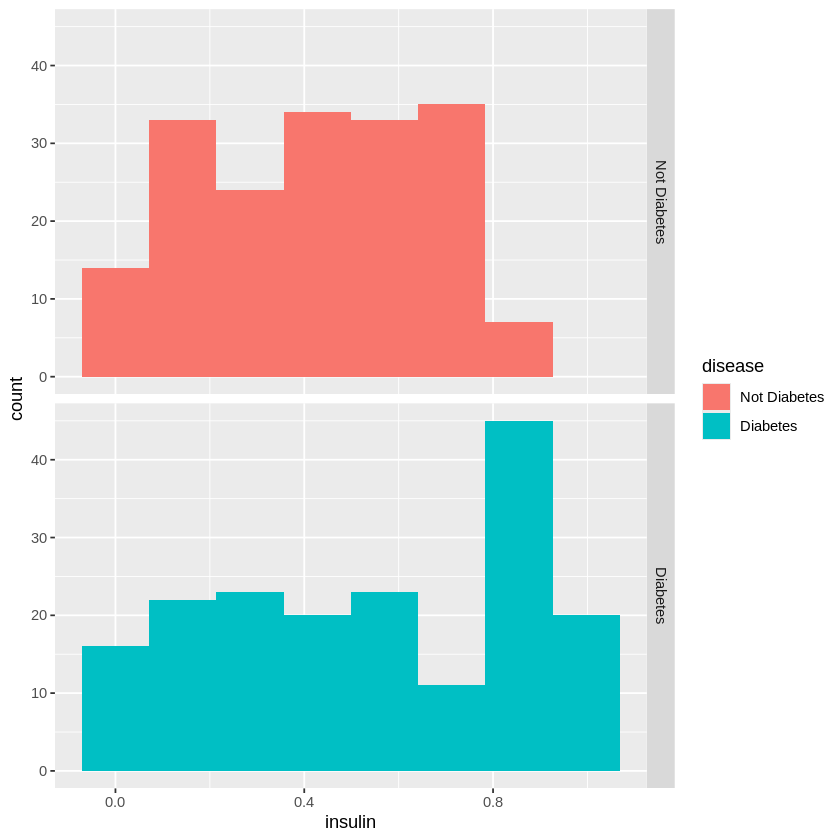

In [18]:
insulin_histogram <- training_blood_samples |> 
                        ggplot(aes(x=insulin, fill = disease)) +
                        geom_histogram(bins = 8) +
                        facet_grid(rows = vars(disease))
insulin_histogram

As predicted, the diabetic group has a significant portion of people with insulin levels greater than those without diabetes (0.8). Let's compute the average insulin level of each group:

In [41]:
mean_insulin <- training_blood_samples |>
group_by(disease) |>
summarize(mean_insulin = mean(insulin)) 
mean_insulin

disease,mean_insulin
<fct>,<dbl>
Not Diabetes,0.4170039
Diabetes,0.5416150


The diabetic group has a higher average insulin level: this matches with our hypothesis.

We can now make a classification model to identify whether a person has diabetes or not. First, we create a recipe and model, using glucose and insulin as predictors, then check for which k we should use for the number of neighbours using a workflow.
We then create a plot of the accuracy estimate against the number of k. 


In [19]:
disease_recipe <- recipe(disease ~ glucose + insulin, data = training_blood_samples)

disease_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")


k_vals <- tibble(neighbors = seq(from = 1, to = 51, by = 2))

disease_vfold <- vfold_cv(training_blood_samples, v = 5, strata = disease)


tune_results <- workflow() |>
  add_recipe(disease_recipe) |>
  add_model(disease_spec) |>
  tune_grid(resamples = disease_vfold, grid = k_vals) |>
  collect_metrics()

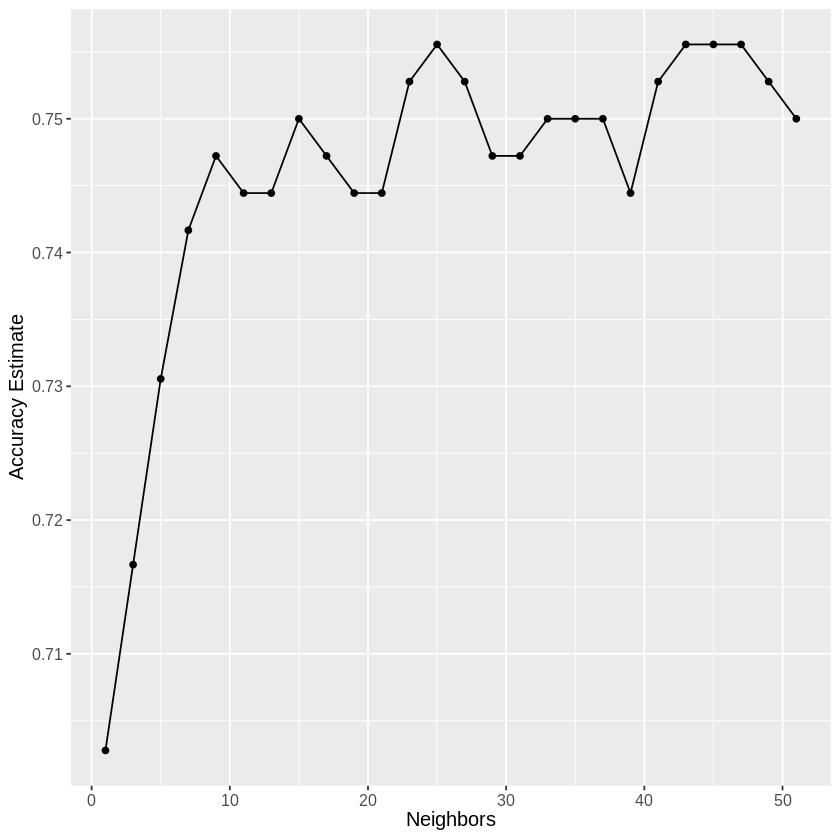

In [20]:
accuracies <- tune_results |>
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

In [42]:
disease_best_k <- nearest_neighbor(weight_func = "rectangular", neighbors = 25) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(disease_recipe) |>
  add_model(disease_best_k) |>
  fit(data = training_blood_samples)


In [43]:
diabetes_predictions <- predict(knn_fit, testing_blood_samples) |>
  bind_cols(testing_blood_samples)

diabetes_predictions |>
  metrics(truth = disease, estimate = .pred_class) |>
  filter(.metric == "accuracy")


# diabetes_test_predictions |>
#   metrics(truth = disease, estimate = .pred_class) |>
#   filter(.metric == "accuracy")

# diabetes_test_predictions |>
#   precision(truth = disease, estimate = .pred_class, event_level = "first")

# diabetes_test_predictions |>
#   recall(truth = disease, estimate = .pred_class, event_level = "first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7625899


## Discussion

Based on the analysis that we performed on the data, we were able to create a model for predicting diabetes that achieves 76% accuracy on the test data. The findings suggest that the performance was impacted by the quality of the dataset that was used. Given that there was only 412 rows of data to train the model, more data would be needed to create a better model. To improve the data quality, we addressed the class imbalance which can affect KNN classifier performance. We compared the accuracy of upsampling versus downsampling and found that downsampling yielded better accuracy. 


If the performance of the model can ly improved, such a model could see use in healthcare settings and applications. Ideally, more relevant health parameters are utilized to determine an individual’s level of risk. This can then help the individual guide their self-care and prevent themselves from developing diabetes. Studies have shown that North America currently faces “a high burden of diabetes” which poses concerns to society broadly (Yisahek et. al). Thus, we think this raises new questions regarding the intersection of diabetes and data science thwe would like to see explored:ore

* Are there additional health parameters that should be measured for training the model?
* Are there ethical concerns regarding the use of using classification models to predict health risks?
* How would an individual input such information into the model to receive a diagnosis?
* A variety of different models exist for classification, which would be the best for this application?
* How can the model be expanded to predict other diseases beyond diabete

In particular, we see potential in the last question that is listed. More in-depth research previously conducted by the scientific community showed promising results in using classifier models for predicting colon cancer and cardiovascular disease based on metrics (Salmi and Rustam; Subasish et. al). We hope in the future that a single model will be capable of diagnosing a wide range of different health concerns.s?


### References

Aboelnaga, Ehab. “Multiple Disease Prediction.” *Kaggle*, 3 Mar. 2024, \
&nbsp;&nbsp;&nbsp;&nbsp;www.kaggle.com/datasets/ehababoelnaga/multiple-disease-prediction. \
\
Mohapatra, Subasish, et al. “A Stacking Classifiers Model for Detecting Heart Irregularities and Predicting \
&nbsp;&nbsp;&nbsp;&nbsp;Cardiovascular Disease – Doaj.” *Healthcare Analytics*, Elsevier, 1 Nov. 2023, \
&nbsp;&nbsp;&nbsp;&nbsp;doaj.org/article/30ed086a39704f4db6ce3fd0fa7d9aeb. \
\
Salmi, Nafizatus, and Zuherman Rustam. “Naïve Bayes Classifier Models for Predicting the Colon Cancer.” *IOP* \
&nbsp;&nbsp;&nbsp;&nbsp;*Conference Series: Materials Science and Engineering*, IOP Publishing, 1 June 2019, \
&nbsp;&nbsp;&nbsp;&nbsp;iopscience.iop.org/article/10.1088/1757-899X/546/5/052068. \
\
Yisahak, Samrawit F., et al. “Diabetes in North America and the Caribbean: An Update.” *Diabetes Research and* \
&nbsp;&nbsp;&nbsp;&nbsp;*Clinical Practice*, Elsevier, 1 Dec. 2013, www.sciencedirect.com/science/article/pii/S0168822713003926. 